## Q1) Delivery_time -> Predict delivery time using sorting time Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading a csv file using pandas library
dataset=pd.read_csv("delivery_time.csv")
dataset.head()
#x=sortingtime , y=deliverytime 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA(explotary data analysis)

In [3]:
#Data Structure
dataset.shape

(21, 2)

In [4]:
#data types
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# There are no null values 

### Duplicates

In [7]:
#Count of duplicated rows
dataset[dataset.duplicated()].shape

(0, 2)

In [8]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)
dataset.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Data Visualization

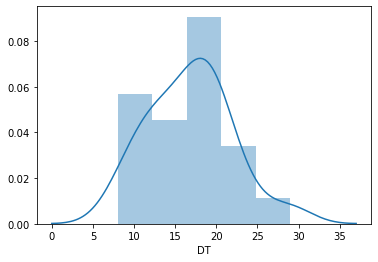

In [9]:
sns.distplot(dataset['DT'])

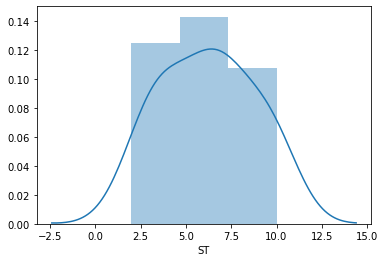

In [10]:
sns.distplot(dataset['ST'])

### Outlier Detection

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

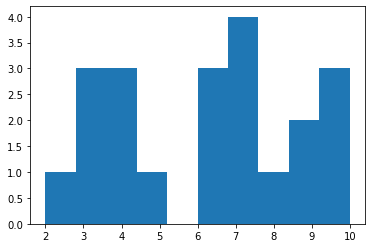

In [11]:
plt.hist(dataset['ST'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad6873f490>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad6873fb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad6873f130>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad6874a250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad6874a550>],
 'means': []}

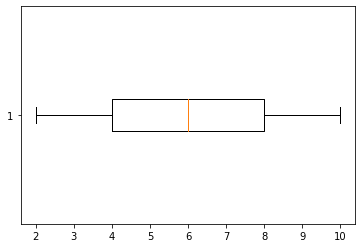

In [12]:
plt.boxplot(dataset['ST'],0,"rs",0)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

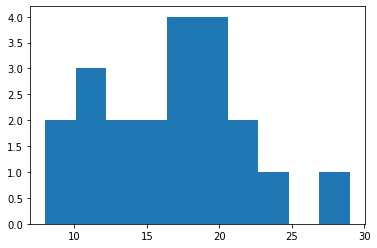

In [13]:
plt.hist(dataset['DT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad6880d4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad6880db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad6880d160>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad68817280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad68817580>],
 'means': []}

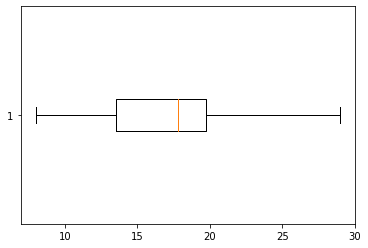

In [14]:
plt.boxplot(dataset['DT'],0,"rs",0)

In [15]:
dataset.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Scatter plot and Correlation analysis

#### Correlation Analysis

In [16]:
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [17]:
# or using numpy
np.corrcoef(dataset['ST'],dataset['DT'])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [18]:
# 0.82599726 
# correlation value between X and Y

#### Scatter plot

Text(0, 0.5, 'Delivery Time')

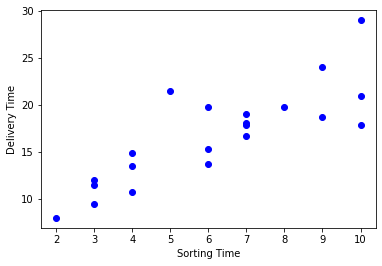

In [19]:
plt.plot(dataset['ST'],dataset['DT'],"bo");
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

#or

#sns.scatterplot(x=dataset['ST'],y=dataset['DT'])

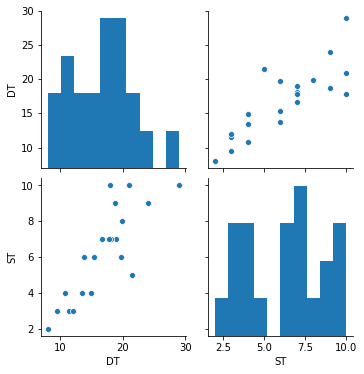

In [20]:
import seaborn as sns
sns.pairplot(dataset) # gives the histogram and the scatter plot between the two variables

### Model Building

In [21]:
# For preparing linear regression model we need to import the statsmodels.formula.api

In [22]:
import statsmodels.formula.api as smf
model=smf.ols("DT~ST",data=dataset).fit()

### Model Testing

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        14:08:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [25]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [26]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [27]:
## Predicted values of Delivery Time using the model for entire dataset
pred=model.predict(dataset)
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [28]:
#Adding the column name 
pred = pd.DataFrame (model.predict(dataset), columns=['Predicted_Delivery'])
#pred

In [29]:
pred1 = pd.concat([dataset, pred], axis=1)
pred1.head()

,DT,ST,Predicted_Delivery
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [30]:
#Error
Error = pd.DataFrame ((pred1['DT']- pred1['Predicted_Delivery']), columns=['Error'])

In [31]:
final = pd.concat ([pred1, Error], axis=1)
final.head()

,DT,ST,Predicted_Delivery,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


In [32]:
# Visualization of regresion line over the scatter plot of Sorting time and Delivery time

Text(0, 0.5, 'Delivery Time')

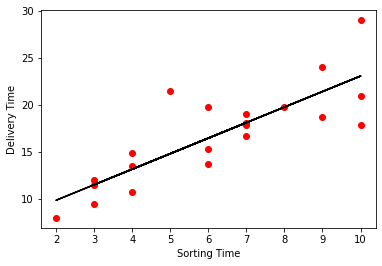

In [33]:
plt.scatter(x=dataset['ST'],y=dataset['DT'],color='red')
plt.plot(dataset['ST'],pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

#or

#sns.regplot(x=dataset['ST'],y=dataset['DT'])

In [34]:
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


### Transformating variables for accuracy

In [35]:
model2 =  smf.ols("DT~np.log(ST)",data=dataset).fit()

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.64e-06
Time:                        14:08:09   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Finding Coefficient parameters
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [38]:
# Finding tvalues and pvalues
model2.tvalues , model2.pvalues

(Intercept     0.472460
 np.log(ST)    6.586789
 dtype: float64,
 Intercept     0.641980
 np.log(ST)    0.000003
 dtype: float64)

In [39]:
# Finding Rsquared Values
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

# Model Predictions

In [40]:
#Prediction for the entire dataset
pred2=model2.predict(dataset)
pred2.head()


0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [41]:
pred2.corr(dataset.DT)

0.8339325279256244

In [42]:
pred2 = pd.DataFrame (model2.predict(dataset), columns=['Predicted_DT2'])
pred2.head()

,Predicted_DT2
0,21.982913
1,13.696517
2,17.363305
3,21.030094
4,21.982913


In [43]:
pred21 = pd.concat([dataset,pred2 ], axis=1)
pred21.head()

,DT,ST,Predicted_DT2
0,21.00,10,21.982913
1,13.50,4,13.696517
2,19.75,6,17.363305
3,24.00,9,21.030094
4,29.00,10,21.982913


In [44]:
#Error
Error2 = pd.DataFrame ((pred21['DT']- pred21['Predicted_DT2']), columns=['Error'])
#Error2

In [45]:
final2 = pd.concat ([pred21, Error2], axis=1)
final2.head()

,DT,ST,Predicted_DT2,Error
0,21.00,10,21.982913,-0.982913
1,13.50,4,13.696517,-0.196517
2,19.75,6,17.363305,2.386695
3,24.00,9,21.030094,2.969906
4,29.00,10,21.982913,7.017087


Text(0, 0.5, 'DT')

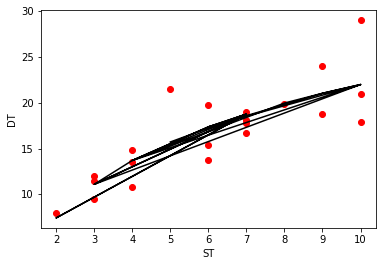

In [46]:
plt.scatter(x=dataset['ST'],y=dataset['DT'],color='red')
plt.plot(dataset['ST'],pred2,color='black')
plt.xlabel('ST')
plt.ylabel('DT')

## Exponential transformation

In [55]:
model3 =  smf.ols("np.log(DT)~ST",data=dataset).fit()

In [56]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.59e-06
Time:                        14:09:31   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Finding Coefficient parameters
model3.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [59]:
# Finding tvalues and pvalues
model3.tvalues , model3.pvalues

(Intercept    20.601357
 ST            6.836088
 dtype: float64,
 Intercept    1.857343e-14
 ST           1.592708e-06
 dtype: float64)

In [60]:
# Finding Rsquared Values
model3.rsquared , model3.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

# Model Predictions

In [61]:
#Prediction for the entire dataset
pred3=model3.predict(dataset)
pred3.head()

0    3.176888
1    2.543578
2    2.754681
3    3.071336
4    3.176888
dtype: float64

In [62]:
pred31=np.exp(pred3) 
pred31.head()

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

In [63]:
pred31.corr(dataset['DT'])

0.808578010828926

In [64]:
pred31 = pd.DataFrame (np.exp(pred3), columns=['Predicted_DT3'])
pred31.head()

,Predicted_DT3
0,23.972032
1,12.725123
2,15.716034
3,21.570707
4,23.972032


In [65]:
pred32 = pd.concat([dataset,pred31], axis=1)
pred32.head()

,DT,ST,Predicted_DT3
0,21.00,10,23.972032
1,13.50,4,12.725123
2,19.75,6,15.716034
3,24.00,9,21.570707
4,29.00,10,23.972032


In [66]:
#Error
Error3 = pd.DataFrame ((pred32['DT']- pred32['Predicted_DT3']), columns=['Error3'])
#Error3

In [67]:
final3 = pd.concat ([pred32, Error3], axis=1)
final3.head()

,DT,ST,Predicted_DT3,Error3
0,21.00,10,23.972032,-2.972032
1,13.50,4,12.725123,0.774877
2,19.75,6,15.716034,4.033966
3,24.00,9,21.570707,2.429293
4,29.00,10,23.972032,5.027968


Text(0, 0.5, 'DT')

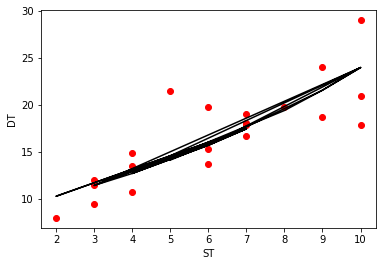

In [69]:
plt.scatter(x=dataset['ST'],y=dataset['DT'],color='red')
plt.plot(dataset['ST'],pred31,color='black')
plt.xlabel('ST')
plt.ylabel('DT')

### Inference
- We can see Expoential transformation,  is giving accuracy model having the highest R-squared value